# Coursera_Capstone - Code for Report

In [1]:
# preparation
import numpy as np
import pandas as pd
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv', sep=',', delimiter=None, header='infer')
pd.set_option('display.max_columns', None)
df1=df
df1=df[df.STATUS=="Matched"]
df1.drop(['X','Y','SDOTCOLNUM','SEVERITYCODE.1','OBJECTID','INCKEY','COLDETKEY','EXCEPTRSNCODE','EXCEPTRSNDESC'], axis=1, index=None, columns=None, level=None, inplace=True, errors='raise')

C:\Users\Alex Wong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Alex Wong\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [2]:
# Background Data Analysis:
df2=df1.copy(deep=True) 

 # Prepare date and time:
df2['INCDATE']= pd.to_datetime(df2['INCDATE']) 
df2['year'] = df2['INCDATE'].dt.year
df2['month'] = df2['INCDATE'].dt.month   
df2['day'] = df2['INCDATE'].dt.day
df2['weekday'] = df2['INCDATE'].dt.weekday  # Monday = 0, Sunday = 6
df2['date'] = df2['INCDATE'].dt.date

df2['INCDTTM']= pd.to_datetime(df2['INCDTTM']) 
df2['hour'] = df2['INCDTTM'].dt.hour  

df2['for_count']=1

# Test Case 1.1  	Get insights from UNDERINFL - Whether or not a driver involved was under the influence of drugs or alcohol.

In [3]:
# Prepare UNDERINF = Yes or 1, means drugs or alcohol 

df_UNDERINF = df2[(df2['UNDERINFL'] == 'Y') | (df2['UNDERINFL'] == '1')]
df_UNDERINF["y or 1"]=1   

df_UNDERINF["y or 1"].count()

C:\Users\Alex Wong\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


9121

In [7]:
# Driver involved was under the influence of drugs or alcohol = 9121
# Total case = 189786
# Overall %

print (round(9121/189786*100,2))
#4.81%


4.81


# Test Case 2.1a Data Analysis - UNDERINFL vs. Year, UNDERINFL means -  Accident that the driver involved was under the influence of drugs or alcohol 

In [381]:
# check 2020 no such record
df_UNDERINF["UNDERINFL"].unique()
df_UNDERINF["year"].unique()

df_UNDERINF2020 = df2[(df2['UNDERINFL'] == 'Y') | (df2['UNDERINFL'] == '1')]


In [407]:
#check 2020

# df_UNDERINF[(df_UNDERINF['year']==2020) & (df_UNDERINF['y or 1']=="1")]  
#  or
df2[df2['year']==2010]['UNDERINFL'].unique()

array(['N', 'Y', '0', '1'], dtype=object)

In [242]:
#test case 2.1a 


DF_UNDERINF_year=df_UNDERINF[["y or 1","year"]].groupby(['year']).count()
DF_UNDERINF_year


,y or 1
year,
2004,568
2005,688
2006,725
2007,695
2008,605
2009,592
2010,589
2011,621
2012,594


# Test Case 2.1b UNDERINFL vs. month

In [243]:
DF_UNDERINF_month=df_UNDERINF[["y or 1","month"]].groupby(['month']).count()

DF_UNDERINF_month

,y or 1
month,
1,793
2,731
3,800
4,716
5,738
6,745
7,716
8,713
9,668


# Test Case 2.1c UNDERINFL vs. hour

In [451]:
DF_UNDERINF_hour=df_UNDERINF[["y or 1","hour"]].groupby(['hour']).count()
DF_UNDERINF_hour

,y or 1
hour,
0,1927
1,866
2,854
3,298
4,187
5,93
6,66
7,77
8,79


# Test Case 2.1d UNDERINFL vs. weekday

In [239]:
DF_UNDERINF_weekday=df_UNDERINF[["y or 1","weekday"]].groupby(['weekday']).count()

# Monday = 0, Sunday = 6
 
DF_UNDERINF_weekday 

,y or 1
weekday,
0,860
1,902
2,992
3,1123
4,1497
5,2000
6,1747


# Test Case 2.1 e UNDERINFL vs. Holiday

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=df_UNDERINF['date'].min(), end=df_UNDERINF['date'].max())
 
df_UNDERINF['date'] = pd.to_datetime(df_UNDERINF['date'],format='%Y-%m-%d')

df_UNDERINF['Holiday'] = df_UNDERINF['date'].isin(holidays)

df_UNDERINF_Holiday=df_UNDERINF[df_UNDERINF['Holiday']]
df_UNDERINF_Holiday.sort_values(by='date', ascending=True) 


In [448]:

#  235 Drug / alchol accident happend during holiday)

df_UNDERINF_Holiday.count() 

SEVERITYCODE      235
REPORTNO          235
STATUS            235
ADDRTYPE          235
INTKEY             68
LOCATION          235
SEVERITYDESC      235
COLLISIONTYPE     235
PERSONCOUNT       235
PEDCOUNT          235
PEDCYLCOUNT       235
VEHCOUNT          235
INCDATE           235
INCDTTM           235
JUNCTIONTYPE      235
SDOT_COLCODE      235
SDOT_COLDESC      235
INATTENTIONIND     23
UNDERINFL         235
WEATHER           235
ROADCOND          235
LIGHTCOND         235
PEDROWNOTGRNT       4
SPEEDING           41
ST_COLCODE        235
ST_COLDESC        235
SEGLANEKEY        235
CROSSWALKKEY      235
HITPARKEDCAR      235
year              235
month             235
day               235
weekday           235
date              235
hour              235
y or 1            235
Holiday           235
dtype: int64

In [434]:
235/9121*100

2.5764718780835434

# Test Case 3.1 Graph

In [312]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
mpl.style.use(['ggplot']) # optional: for ggplot-like style

Matplotlib version:  3.1.0


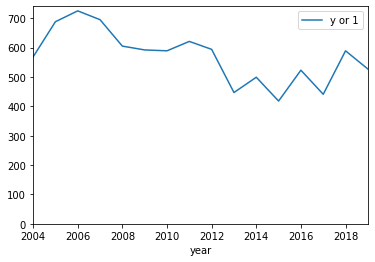

In [444]:
DF_UNDERINF_year.plot()
plt.ylim(ymin=0)  # set y start from 0
plt.show()

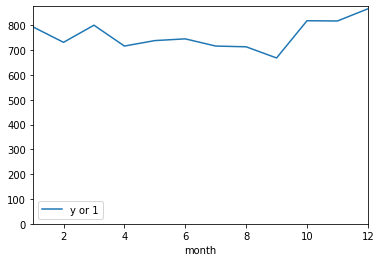

In [443]:
DF_UNDERINF_month.plot()
plt.ylim(ymin=0)  # set y start from 0
plt.show()

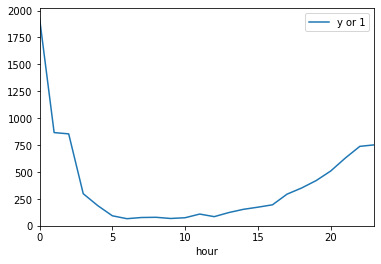

In [449]:
DF_UNDERINF_hour.plot()
plt.ylim(ymin=0)  # set y start from 0
plt.show()

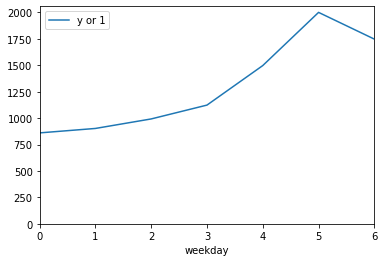

In [442]:
DF_UNDERINF_weekday.plot()
plt.ylim(ymin=0)  # set y start from 0
plt.show()
# Monday = 0, Sunday = 6

# Test Case 1.2 Get Insight From - Speeding

# Test Case 2.2 Data Analysis -  Speeding

# Test Case 3.2 Graphic for Speeding

In [447]:
df_testcase2=df2.copy(deep=True)

In [ ]:
df_testcase2

# Test Case 1.3    Get Insight From - Weather VS Car Incident
# Test Case 2.3    Weather VS Car Incident
# Test Case 3.3    Graphic  

# Test Case 4.1  - Correlations of  drugs or alcohol vs Severity Code + Graphic to Visualize the result (if any)

In [467]:
df_UNDERINF[['SEVERITYCODE','y or 1']].groupby(['SEVERITYCODE']).count()

#•	3—fatality
##•	2b—serious injury
#•	2—injury
#•	1—prop damage
#•	0—unknown 

,y or 1
SEVERITYCODE,
1,5559
2,3562


In [500]:
3562/5559

0.6407627271091924

In [497]:
df2[['SEVERITYCODE','for_count']].groupby(['SEVERITYCODE']).count()

,for_count
SEVERITYCODE,
1,132627
2,57159


In [501]:
57159/132627

0.4309755932050035

In [504]:
(0.6407627271091924-0.4309755932050035)/0.4309755932050035

0.48677265537029785

In [510]:
df_UNDERINF[['PERSONCOUNT','y or 1']].groupby(['PERSONCOUNT']).count().head(5)

,y or 1
PERSONCOUNT,
1,1776
2,3616
3,1986
4,897
5,436


In [495]:
df_UNDERINF[df_UNDERINF['PERSONCOUNT']==0]

# with drug / alchol, alawys 1 PERSONCOUNT 

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,year,month,day,weekday,date,hour,for_count,y or 1


In [509]:

df2[['PERSONCOUNT','for_count']].groupby(['PERSONCOUNT']).count().head(5)

,for_count
PERSONCOUNT,
0,5538
1,11728
2,111402
3,35142
4,14445


In [481]:
df_UNDERINF[['SPEEDING','y or 1']].groupby(['SPEEDING']).count()

,y or 1
SPEEDING,
Y,1249


In [476]:
df_UNDERINF[['INATTENTIONIND','y or 1']].groupby(['INATTENTIONIND']).count()

,y or 1
INATTENTIONIND,
Y,1012


In [508]:
df_UNDERINF[['ST_COLDESC','y or 1']].groupby(['ST_COLDESC']).count().sort_values(by='y or 1', ascending=False).head(3)
# top 3

,y or 1
ST_COLDESC,
One parked--one moving,2512
Fixed object,2248
From same direction - both going straight - one stopped - rear-end,1074


In [486]:
df2[['hour','PERSONCOUNT']].corr()

,hour,PERSONCOUNT
hour,1.00000,0.02856
PERSONCOUNT,0.02856,1.00000


In [482]:
df_UNDERINF[['hour','PERSONCOUNT']].corr()

,hour,PERSONCOUNT
hour,1.000000,0.040819
PERSONCOUNT,0.040819,1.000000


In [484]:
df2[['PERSONCOUNT','VEHCOUNT']].corr()

,PERSONCOUNT,VEHCOUNT
PERSONCOUNT,1.000000,0.400757
VEHCOUNT,0.400757,1.000000


In [485]:
df_UNDERINF[['PERSONCOUNT','VEHCOUNT']].corr()

,PERSONCOUNT,VEHCOUNT
PERSONCOUNT,1.000000,0.654789
VEHCOUNT,0.654789,1.000000


In [512]:
df_UNDERINF.head()

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,year,month,day,weekday,date,hour,for_count,y or 1
33,1,2806828,Matched,Block,NaN,RENTON AVE S BETWEEN S CAMANO PL AND S CLOVERD...,Property Damage Only Collision,Parked Car,3,0,0,2,2007-02-22 00:00:00+00:00,2007-02-22 20:32:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,1,Clear,Dry,Dark - Street Lights On,NaN,NaN,32,One parked--one moving,0,0,N,2007,2,22,3,2007-02-22,20,1,1
110,1,3502001,Matched,Intersection,37950.0,36TH AVE NE AND NE 85TH ST,Property Damage Only Collision,Parked Car,4,0,0,4,2013-03-26 00:00:00+00:00,2013-03-26 18:31:00,At Intersection (intersection related),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,Y,Clear,Dry,Dusk,NaN,NaN,32,One parked--one moving,0,0,N,2013,3,26,1,2013-03-26,18,1,1
124,2,3605976,Matched,Intersection,29069.0,HARVARD AVE AND E DENNY WAY,Injury Collision,Angles,2,0,0,2,2013-03-29 00:00:00+00:00,2013-03-29 16:34:00,At Intersection (intersection related),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,Y,Clear,Dry,Daylight,NaN,Y,10,Entering at angle,0,0,N,2013,3,29,4,2013-03-29,16,1,1
158,2,3503039,Matched,Block,NaN,WINONA AVE N BETWEEN N 74TH ST AND AURORA AVE N,Injury Collision,Parked Car,2,0,0,2,2013-03-29 00:00:00+00:00,2013-03-29 17:42:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,Y,Clear,Dry,Daylight,NaN,NaN,32,One parked--one moving,0,0,N,2013,3,29,4,2013-03-29,17,1,1
175,2,1790753,Matched,Block,NaN,WEST SEATTLE BR WB BETWEEN SW ADMIRAL WY OFF R...,Injury Collision,Other,2,0,0,1,2005-01-14 00:00:00+00:00,2005-01-14 03:26:00,Mid-Block (but intersection related),28,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,1,Clear,Dry,Dark - Street Lights Off,NaN,NaN,50,Fixed object,0,0,N,2005,1,14,4,2005-01-14,3,1,1


In [513]:
df2[['PERSONCOUNT','hour']].corr()

,PERSONCOUNT,hour
PERSONCOUNT,1.00000,0.02856
hour,0.02856,1.00000


In [514]:
df_UNDERINF[['PERSONCOUNT','hour']].corr()

,PERSONCOUNT,hour
PERSONCOUNT,1.000000,0.040819
hour,0.040819,1.000000


# Test Case 4.1b - Correlation of  drugs or alcohol vs PERSONCOUNT’ + Graphic to Visualize the result

# Test Case 4.2 - Correlation of  A & B + Graphic to Visualize the result

# Test Case 4.3 - Correlation of  A & B + Graphic to Visualize the result

# Free-style playing for brain strom

In [8]:
# find out the car accident black spot
df2.head()

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,year,month,day,weekday,date,hour
0,2,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,N,2013,3,27,2,2013-03-27,14
1,1,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N,2006,12,20,2,2006-12-20,18
2,1,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,One parked--one moving,0,0,N,2004,11,18,3,2004-11-18,10
3,1,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,23,From same direction - all others,0,0,N,2013,3,29,4,2013-03-29,9
4,2,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,N,2004,1,28,2,2004-01-28,8


In [13]:
df2.LOCATION.nunique()

23956

In [23]:
df2[['LOCATION','for_count']].groupby(['LOCATION']).count().sort_values(by='for_count', ascending=False).head(10) 

,for_count
LOCATION,
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,274
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,268
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,260
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,247
6TH AVE AND JAMES ST,242
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP,237
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST,235
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST,229
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP,209


In [ ]:
df2[['LOCATION','PERSONCOUNT']].groupby(['PERSONCOUNT']).sum().sort_values(by='PERSONCOUNT', ascending=False).head(10) 
    

In [5]:
df2

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,year,month,day,weekday,date,hour,for_count
0,2,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,N,2013,3,27,2,2013-03-27,14,1
1,1,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N,2006,12,20,2,2006-12-20,18,1
2,1,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,One parked--one moving,0,0,N,2004,11,18,3,2004-11-18,10,1
3,1,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,23,From same direction - all others,0,0,N,2013,3,29,4,2013-03-29,9,1
4,2,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,N,2004,1,28,2,2004-01-28,8,1
5,1,E919477,Matched,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,Angles,2,0,0,2,2019-04-20 00:00:00+00:00,2019-04-20 17:42:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,10,Entering at angle,0,0,N,2019,4,20,5,2019-04-20,17,1
6,1,3282542,Matched,Intersection,29510.0,DENNY WAY AND WESTLAKE AVE,Property Damage Only Collision,Angles,2,0,0,2,2008-12-09 00:00:00+00:00,2008-12-09 00:00:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,10,Entering at angle,0,0,N,2008,12,9,1,2008-12-09,0,1
7,2,EA30304,Matched,Intersection,29745.0,BROADWAY AND E PIKE ST,Injury Collision,Cycles,3,0,1,1,2020-04-15 00:00:00+00:00,2020-04-15 17:47:00,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Daylight,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N,2020,4,15,2,2020-04-15,17,1
8,1,2071243,Matched,Block,NaN,PINE ST BETWEEN 5TH AVE AND 6TH AVE,Property Damage Only Collision,Parked Car,2,0,0,2,2006-06-15 00:00:00+00:00,2006-06-15 13:00:00,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,NaN,32,One parked--one moving,0,0,N,2006,6,15,3,2006-06-15,13,1
9,2,2072105,Matched,Intersection,34679.0,41ST AVE SW AND SW THISTLE ST,Injury Collision,Angles,2,0,0,2,2006-03-20 00:00:00+00:00,2006-03-20 15:49:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,NaN,10,Entering at angle,0,0,N,2006,3,20,0,2006-03-20,15,1


In [ ]:
df2[['LOCATION','PERSONCOUNT']].groupby(['PERSONCOUNT']).sum()

In [4]:
df_UNDERINF

,SEVERITYCODE,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,year,month,day,weekday,date,hour,for_count,y or 1
33,1,2806828,Matched,Block,NaN,RENTON AVE S BETWEEN S CAMANO PL AND S CLOVERD...,Property Damage Only Collision,Parked Car,3,0,0,2,2007-02-22 00:00:00+00:00,2007-02-22 20:32:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,1,Clear,Dry,Dark - Street Lights On,NaN,NaN,32,One parked--one moving,0,0,N,2007,2,22,3,2007-02-22,20,1,1
110,1,3502001,Matched,Intersection,37950.0,36TH AVE NE AND NE 85TH ST,Property Damage Only Collision,Parked Car,4,0,0,4,2013-03-26 00:00:00+00:00,2013-03-26 18:31:00,At Intersection (intersection related),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,Y,Clear,Dry,Dusk,NaN,NaN,32,One parked--one moving,0,0,N,2013,3,26,1,2013-03-26,18,1,1
124,2,3605976,Matched,Intersection,29069.0,HARVARD AVE AND E DENNY WAY,Injury Collision,Angles,2,0,0,2,2013-03-29 00:00:00+00:00,2013-03-29 16:34:00,At Intersection (intersection related),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,Y,Clear,Dry,Daylight,NaN,Y,10,Entering at angle,0,0,N,2013,3,29,4,2013-03-29,16,1,1
158,2,3503039,Matched,Block,NaN,WINONA AVE N BETWEEN N 74TH ST AND AURORA AVE N,Injury Collision,Parked Car,2,0,0,2,2013-03-29 00:00:00+00:00,2013-03-29 17:42:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,Y,Clear,Dry,Daylight,NaN,NaN,32,One parked--one moving,0,0,N,2013,3,29,4,2013-03-29,17,1,1
175,2,1790753,Matched,Block,NaN,WEST SEATTLE BR WB BETWEEN SW ADMIRAL WY OFF R...,Injury Collision,Other,2,0,0,1,2005-01-14 00:00:00+00:00,2005-01-14 03:26:00,Mid-Block (but intersection related),28,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,1,Clear,Dry,Dark - Street Lights Off,NaN,NaN,50,Fixed object,0,0,N,2005,1,14,4,2005-01-14,3,1,1
196,2,1076796,Matched,Block,NaN,CALIFORNIA AVE SW BETWEEN SW SPOKANE ST AND SW...,Injury Collision,Parked Car,4,0,0,3,2005-10-09 00:00:00+00:00,2005-10-09 00:00:00,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,1,Clear,Dry,Dark - Street Lights On,NaN,NaN,32,One parked--one moving,0,0,N,2005,10,9,6,2005-10-09,0,1,1
200,1,3643906,Matched,Block,NaN,W NICKERSON ST BETWEEN 13TH AVE W AND 14TH AVE W,Property Damage Only Collision,Other,1,0,0,1,2013-03-31 00:00:00+00:00,2013-03-31 23:19:00,Mid-Block (not related to intersection),28,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,Y,Clear,Dry,Dark - Street Lights On,NaN,NaN,50,Fixed object,0,0,N,2013,3,31,6,2013-03-31,23,1,1
227,1,3598980,Matched,Intersection,29666.0,2ND AVE AND BROAD ST,Property Damage Only Collision,Angles,3,0,0,2,2013-03-29 00:00:00+00:00,2013-03-29 21:40:00,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,Y,Clear,Dry,Dark - Street Lights On,NaN,NaN,10,Entering at angle,0,0,N,2013,3,29,4,2013-03-29,21,1,1
251,2,1789710,Matched,Block,NaN,ALASKAN WAY S BETWEEN YESLER WAY AND PIER 48 A...,Injury Collision,Other,2,0,0,1,2004-04-24 00:00:00+00:00,2004-04-24 02:18:00,Mid-Block (not related to intersection),28,MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT,NaN,1,Clear,Dry,Dark - Street Lights On,NaN,Y,50,Fixed object,0,0,N,2004,4,24,5,2004-04-24,2,1,1
367,2,2882817,Matched,Block,NaN,UNIVERSITY BR BETWEEN POINT B AND EASTLAKE AVE NE,Injury Collision,Other,1,0,0,1,2009-09-30 00:00:00+00:00,2009-09-30 08:50:00,Mid-Block (not related to intersection),26,MOTOR VEHICLE STRUCK OBJECT IN ROAD,NaN,1,Clear,Dry,Daylight,NaN,NaN,50,Fixed object,0,0,N,2009,9,30,2,2009-09-30,8,1,1


In [ ]:
df_UNDERINF[['LOCATION','PERSONCOUNT']].groupby(['PERSONCOUNT'])